# Taxi Driver Boostrap

In [2]:
# python 3.9.7
import os
import sys

# if jupyter python path is being a bitch
# !{sys.executable} -m pip install keras

import gym
import numpy as np
import torch
import time
import matplotlib.pyplot as plt
import pickle



  Using cached keras-2.8.0-py2.py3-none-any.whl (1.4 MB)
You should consider upgrading via the '/Users/ryanheadley/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


## Test Environment

In [8]:
print(gym.envs.registry.all())

ValuesView(├──CartPole: [ v0, v1 ]
├──MountainCar: [ v0 ]
├──MountainCarContinuous: [ v0 ]
├──Pendulum: [ v1 ]
├──Acrobot: [ v1 ]
├──LunarLander: [ v2 ]
├──LunarLanderContinuous: [ v2 ]
├──BipedalWalker: [ v3 ]
├──BipedalWalkerHardcore: [ v3 ]
├──CarRacing: [ v1 ]
├──Blackjack: [ v1 ]
├──FrozenLake: [ v1 ]
├──FrozenLake8x8: [ v1 ]
├──CliffWalking: [ v0 ]
├──Taxi: [ v3 ]
├──Reacher: [ v2 ]
├──Pusher: [ v2 ]
├──Thrower: [ v2 ]
├──Striker: [ v2 ]
├──InvertedPendulum: [ v2 ]
├──InvertedDoublePendulum: [ v2 ]
├──HalfCheetah: [ v2, v3 ]
├──Hopper: [ v2, v3 ]
├──Swimmer: [ v2, v3 ]
├──Walker2d: [ v2, v3 ]
├──Ant: [ v2, v3 ]
├──Humanoid: [ v2, v3 ]
└──HumanoidStandup: [ v2 ]
)


In [4]:
env = gym.make('CartPole-v0')
for i_episode in range(20):
    observation = env.reset()
    for t in range(100):
        env.render()
        print(observation)
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break
env.close()

0
1
1
0
0
4
4
0
0
0
0
4
4
Episode finished after 13 timesteps
0
4
0
0
1
0
0
1
2
2
2
3
3
Episode finished after 13 timesteps
0
4
Episode finished after 2 timesteps
0
0
0
0
1
1
Episode finished after 6 timesteps
0
0
0
0
0
0
0
4
Episode finished after 8 timesteps
0
1
1
2
2
3
2
2
2
1
Episode finished after 10 timesteps
0
1
1
2
2
3
3
2
1
1
0
1
2
1
2
6
10
14
14
10
6
10
9
8
Episode finished after 24 timesteps
0
0
0
0
0
0
4
0
0
0
0
0
0
0
4
0
1
Episode finished after 17 timesteps
0
4
Episode finished after 2 timesteps
0
1
2
3
2
1
1
0
0
1
2
3
3
3
Episode finished after 14 timesteps
0
1
Episode finished after 2 timesteps
0
0
0
4
8
Episode finished after 5 timesteps
0
0
0
0
0
0
4
4
4
4
Episode finished after 10 timesteps
0
0
1
Episode finished after 3 timesteps
0
0
4
Episode finished after 3 timesteps
0
4
Episode finished after 2 timesteps
0
0
0
0
4
4
0
0
0
0
4
Episode finished after 11 timesteps
0
0
0
1
Episode finished after 4 timesteps
0
4
8
8
8
9
8
8
4
8
Episode finished after 10 timesteps
0
0

## Frozen Lake

## Q-Learning

In [5]:
env = gym.make('FrozenLake-v1')
print("Action Space:         ", env.action_space)
print("Observation Space:    ", env.observation_space)

Action Space:          Discrete(4)
Observation Space:     Discrete(16)


Q(s,a): Q-values or action values represent a given combination of state and action

R(s,a): Reward for taking that action at that state

In [24]:

gamma = 0.95 # discount the future rewards since less valuable than current
learning_rate = 0.9 # step length taken to update estimation of Q(S,A)
egreedy = 0.7 # 70% random actions
egreedy_final = 0.1 # epsilon value to stop decay
egreedy_decay = 0.999 # the decay rate
num_episodes = 1000
steps_total = []
rewards_total = []
egreedy_total = []
number_of_states = env.observation_space.n
number_of_actions = env.action_space.n
Q = torch.zeros([number_of_states, number_of_actions])

for i_episode in range(num_episodes):

    # resets the environment
    state = env.reset()
    step = 0
    while True:

        step += 1

        random_for_egreedy = torch.rand(1)[0]

        # start with 70% random actions and with time shift towards optimal actions thanks to egreedy_decay
        if random_for_egreedy > egreedy:
            random_values = Q[state] + torch.rand(1,number_of_actions) / 1000
            action = torch.max(random_values,1)[1][0] #take maximum reward for all actions at given state
            action = action.item()
        else:
            action = env.action_space.sample()

        if egreedy > egreedy_final:
            egreedy *= egreedy_decay

        new_state, reward, done, info = env.step(action)

        # Filling the Q Table
        Q[state, action] = reward + gamma * torch.max(Q[new_state])

        # Setting new state for next action
        state = new_state

        # env.render()
        # time.sleep(0.4)

        if done:
            steps_total.append(step)
            rewards_total.append(reward)
            egreedy_total.append(egreedy)
            if i_episode % 10 == 0:
                print('Episode: {} Reward: {} Steps Taken: {}'.format(i_episode,reward, step))
            break



Episode: 0 Reward: 0.0 Steps Taken: 3
Episode: 10 Reward: 0.0 Steps Taken: 8
Episode: 20 Reward: 0.0 Steps Taken: 5
Episode: 30 Reward: 0.0 Steps Taken: 11
Episode: 40 Reward: 0.0 Steps Taken: 4
Episode: 50 Reward: 0.0 Steps Taken: 9
Episode: 60 Reward: 0.0 Steps Taken: 3
Episode: 70 Reward: 0.0 Steps Taken: 5
Episode: 80 Reward: 0.0 Steps Taken: 9
Episode: 90 Reward: 0.0 Steps Taken: 5
Episode: 100 Reward: 0.0 Steps Taken: 8
Episode: 110 Reward: 0.0 Steps Taken: 2
Episode: 120 Reward: 0.0 Steps Taken: 6
Episode: 130 Reward: 0.0 Steps Taken: 9
Episode: 140 Reward: 0.0 Steps Taken: 4
Episode: 150 Reward: 0.0 Steps Taken: 6
Episode: 160 Reward: 0.0 Steps Taken: 20
Episode: 170 Reward: 0.0 Steps Taken: 5
Episode: 180 Reward: 0.0 Steps Taken: 5
Episode: 190 Reward: 0.0 Steps Taken: 4
Episode: 200 Reward: 0.0 Steps Taken: 2
Episode: 210 Reward: 0.0 Steps Taken: 10
Episode: 220 Reward: 0.0 Steps Taken: 4
Episode: 230 Reward: 1.0 Steps Taken: 13
Episode: 240 Reward: 0.0 Steps Taken: 12
Episod

In [25]:
print(Q)

print("Percent of episodes finished successfully: {0}".format(sum(rewards_total)/num_episodes))
print("Percent of episodes finished successfully (last 100 episodes): {0}".format(sum(rewards_total[-100:])/100))

print("Average number of steps: %.2f" % (sum(steps_total)/num_episodes))
print("Average number of steps (last 100 episodes): %.2f" % (sum(steps_total[-100:])/100))

tensor([[1.0293e-04, 1.1405e-04, 1.0834e-04, 1.1405e-04],
        [1.0834e-04, 1.2005e-04, 0.0000e+00, 1.0834e-04],
        [1.1405e-04, 1.1405e-04, 1.1405e-04, 1.2637e-04],
        [0.0000e+00, 0.0000e+00, 1.2005e-04, 1.1405e-04],
        [5.9874e-01, 0.0000e+00, 1.0293e-04, 1.0834e-04],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [9.2890e-05, 0.0000e+00, 0.0000e+00, 6.9834e-01],
        [0.0000e+00, 6.6342e-01, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [8.5737e-01, 0.0000e+00, 8.5737e-01, 0.0000e+00],
        [7.3509e-01, 8.5737e-01, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]])
Percent of episodes finished successfully: 0.038
Percent of episodes fi

### Show the rewards over episodes

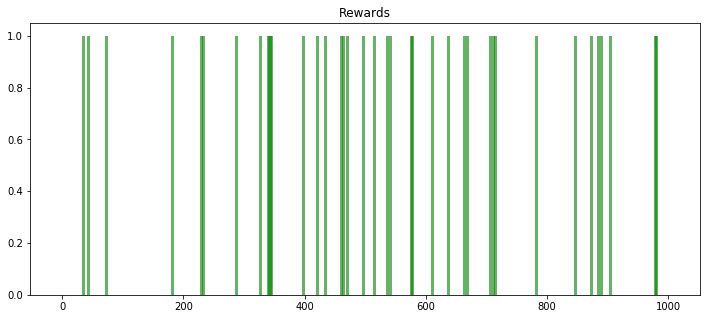

In [26]:
plt.figure(figsize=(12,5))
plt.title("Rewards")
plt.bar(torch.arange(len(rewards_total)), rewards_total, alpha=0.6, color='green', width=5)
plt.show()

### Show the steps over episodes

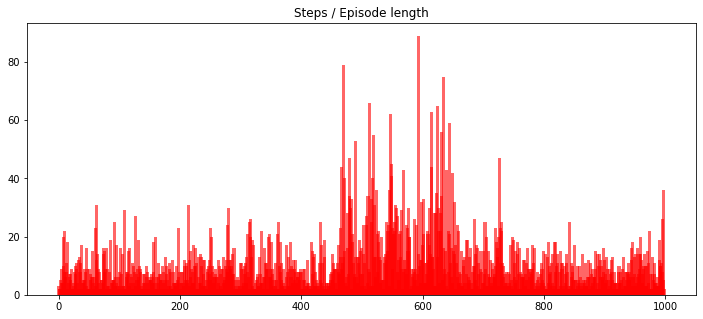

In [27]:
plt.figure(figsize=(12,5))
plt.title("Steps / Episode length")
plt.bar(torch.arange(len(steps_total)), steps_total, alpha=0.6, color='red', width=5)
plt.show()

### Show the epsilon over episodes

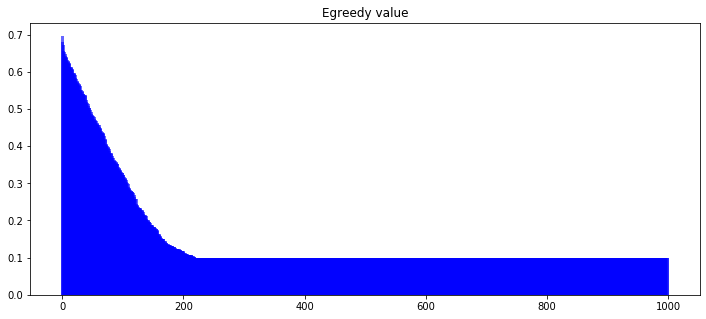

In [10]:
plt.figure(figsize=(12,5))
plt.title("Egreedy value")
plt.bar(torch.arange(len(egreedy_total)), egreedy_total, alpha=0.6, color='blue', width=5)
plt.show()

## SARSA

In [5]:
import random

import gym
import gym.envs.toy_text
import numpy as np
from tqdm import trange
import matplotlib.pyplot as plt
%matplotlib inline

# define path
RESULT_IMG_PATH = 'img/result_img_{}.png'

amap='SFFFHFFFG'
grid_shape = int(np.sqrt(len(amap)))
custom_map = np.array(list(amap)).reshape(grid_shape, grid_shape)
env = gym.envs.toy_text.frozen_lake.FrozenLakeEnv(desc=custom_map).unwrapped
n_actions = env.action_space.n
n_states = env.observation_space.n
print("Action space:", n_actions)
print("State space:", n_states)


Action space: 4
State space: 9


In [ ]:
done = False
env.reset()
while not done:
    # randomly pick an action
    action = np.random.randint(n_actions)
    # get feedback from the environment
    obvervation, reward, done, info = env.step(action)
    # show the environment
    env.render()

In [2]:
n_episodes = 100
reward_array = np.zeros(n_episodes)
# performance of an agent taking random actions
t = trange(n_episodes)
# for each episode
for i in t:
    # reset environment
    env.reset()
    # done flag
    done = False
    while not done:
        # randomly pick an action
        action = np.random.randint(n_actions)
        # get feedback from the environment
        _, reward, done, _ = env.step(action)
        if done:
            # update processing bar
            t.set_description('Episode {} Reward {}'.format(i + 1, reward))
            t.refresh()
            reward_array[i] = reward
            break
env.close()

Episode 100 Reward 0.0: 100%|██████████| 100/100 [00:00<00:00, 582.03it/s]


In [3]:
avg_reward = round(np.mean(reward_array), 4)
print('Averaged reward per episode {}'.format(avg_reward))

Averaged reward per episode 0.15


NameError: name 'RESULT_IMG_PATH' is not defined

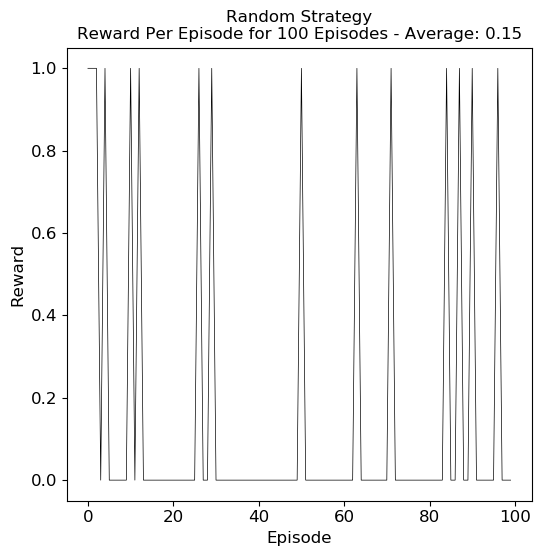

In [4]:
plt.subplots(figsize = (6, 6), dpi=100)
plt.plot(reward_array, color='black', linewidth=0.5)
plt.ylabel('Reward', fontsize=12)
plt.xlabel('Episode', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Random Strategy\nReward Per Episode for {} Episodes - Average: {:.2f}'.format(n_episodes, avg_reward),
          fontsize=12)
# plt.savefig(RESULT_IMG_PATH.format(0), dpi=100, bbox_inches='tight')
plt.show()

### Training

In [6]:
# initialize the agent’s Q-table to zeros
def init_q(s, a):
    """
    s: number of states
    a: number of actions
    """
    return np.zeros((s, a))

# epsilon-greedy exploration strategy
def epsilon_greedy(Q, epsilon, n_actions, s):
    """
    Q: Q Table
    epsilon: exploration parameter
    n_actions: number of actions
    s: state
    """
    # selects a random action with probability epsilon
    if np.random.random() <= epsilon:
        return np.random.randint(n_actions)
    else:
        return np.argmax(Q[s, :])

# SARSA Process
def sarsa(alpha, gamma, epsilon, n_episodes):
    """
    alpha: learning rate
    gamma: exploration parameter
    n_episodes: number of episodes
    """
    # initialize Q table
    Q = init_q(n_states, n_actions)
    t = trange(n_episodes)
    reward_array = np.zeros(n_episodes)
    for i in t:
        # initial state
        s = env.reset()
        # initial action
        a = epsilon_greedy(Q, epsilon, n_actions, s)
        done = False
        while not done:
            s_, reward, done, _ = env.step(a)
            a_ = epsilon_greedy(Q, epsilon, n_actions, s_)
            # update Q table
            Q[s, a] += alpha * (reward + (gamma * Q[s_, a_]) - Q[s, a])
            if done:
                t.set_description('Episode {} Reward {}'.format(i + 1, reward))
                t.refresh()
                reward_array[i] = reward
                break
            s, a = s_, a_
    env.close()
    return Q, reward_array

In [7]:
# experiment settings
alpha = 0.1 # learning rate
gamma = 0.9 # discount factor
epsilon=0.5 # exploration parameter
n_episodes = 1000 # number of training episodes

In [8]:
# training
Q, reward_array = sarsa(alpha, gamma, epsilon, n_episodes)

Episode 1000 Reward 0.0: 100%|██████████| 1000/1000 [00:05<00:00, 177.50it/s]


In [9]:
Q

array([[0.1164595 , 0.12155909, 0.12441601, 0.12339095],
       [0.09722865, 0.08112711, 0.12733082, 0.1466203 ],
       [0.30050647, 0.32156768, 0.37421591, 0.22484981],
       [0.15590415, 0.09792591, 0.09522506, 0.07145169],
       [0.        , 0.        , 0.        , 0.        ],
       [0.42740522, 0.43790027, 0.57565092, 0.18722926],
       [0.19644036, 0.27332096, 0.2102196 , 0.22771737],
       [0.25893197, 0.44231773, 0.43774671, 0.51808568],
       [0.        , 0.        , 0.        , 0.        ]])

In [10]:
# averaged reward per episode
avg_reward = round(np.mean(reward_array), 4)
print('Averaged reward per episode {}'.format(avg_reward))

Averaged reward per episode 0.273


### Testing

In [11]:
def eva(Q, n_episodes):
    """
    Q: trained Q table
    n_episodes: number of episodes
    """
    t = trange(n_episodes)
    reward_array = np.zeros(n_episodes)
    for i in t:
        # initial state
        s = env.reset()
        # initial action
        a = np.argmax(Q[s])
        done = False
        while not done:
            s_, reward, done, _ = env.step(a)
            # pick an action according the state and trained Q table
            a_ = np.argmax(Q[s_])
            if done:
                t.set_description('Episode {} Reward {}'.format(i + 1, reward))
                t.refresh()
                reward_array[i] = reward
                break
            s, a = s_, a_
    env.close()
    return reward_array

In [12]:
# experiment settings
n_episodes = 100 # number of testing episodes
reward_array = eva(Q, n_episodes)

Episode 100 Reward 1.0: 100%|██████████| 100/100 [00:00<00:00, 308.39it/s]


In [13]:
# averaged reward per episode
avg_reward = round(np.mean(reward_array), 4)
print('Averaged reward per episode {}'.format(avg_reward))

Averaged reward per episode 0.75


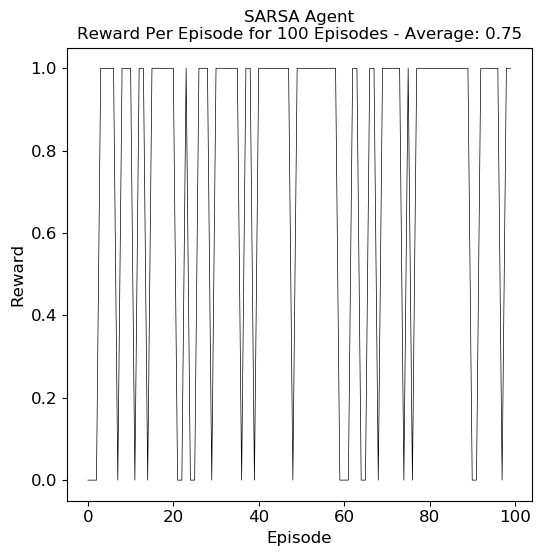

In [14]:
# show reward per episode
plt.subplots(figsize = (6, 6), dpi=100)
plt.plot(reward_array, color='black', linewidth=0.5)
plt.ylabel('Reward', fontsize=12)
plt.xlabel('Episode', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('SARSA Agent\nReward Per Episode for {} Episodes - Average: {:.2f}'.format(n_episodes, avg_reward),
          fontsize=12)
# plt.savefig(RESULT_IMG_PATH.format(1), dpi=100, bbox_inches='tight')
plt.show()

In [15]:
# trained SARSA agent in Frozen Lake
done = False
s = env.reset()
env.render()
while not done:
    # pick an action
    a = np.argmax(Q[s])
    # get feedback from the environment
    s_, _, done, _ = env.step(a)
    # show the environment
    env.render()
    s = s_

## Deep Q Learning

In [15]:
import gym
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings("ignore")
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from collections import deque

In [16]:
import sys
# !{sys.executable} -m pip install tensorflow

In [17]:
custom_map = [
    'FFFF',
    'FHFH',
    'FFFH',
    'HFFG'
]

env = gym.make("FrozenLake-v1", desc=custom_map, is_slippery=False)
train_episodes=4000
test_episodes=100
max_steps=300
state_size = env.observation_space.n
action_size = env.action_space.n
batch_size=32

In [18]:
class Agent:
    def __init__(self, state_size, action_size):
        self.memory = deque(maxlen=2500)
        self.learning_rate=0.001
        self.epsilon=1
        self.max_eps=1
        self.min_eps=0.01
        self.eps_decay = 0.001/3
        self.gamma=0.9
        self.state_size= state_size
        self.action_size= action_size
        self.epsilon_lst=[]
        self.model = self.buildmodel()

    def buildmodel(self):
        model=Sequential()
        model.add(Dense(10, input_dim=self.state_size, activation='relu'))
        model.add(Dense(self.action_size, activation='linear'))
        model.compile(loss='mse', optimizer=Adam(lr=self.learning_rate))
        return model

    def add_memory(self, new_state, reward, done, state, action):
        self.memory.append((new_state, reward, done, state, action))

    def action(self, state):
        if np.random.rand() > self.epsilon:
            return np.random.randint(0,4)
        return np.argmax(self.model.predict(state))

    def pred(self, state):
        return np.argmax(self.model.predict(state))

    def replay(self,batch_size):
        minibatch=random.sample(self.memory, batch_size)
        for new_state, reward, done, state, action in minibatch:
            target= reward
            if not done:
                target=reward + self.gamma* np.amax(self.model.predict(new_state))
            target_f= self.model.predict(state)
            target_f[0][action]= target
            self.model.fit(state, target_f, epochs=1, verbose=0)

        if self.epsilon > self.min_eps:
            self.epsilon=(self.max_eps - self.min_eps) * np.exp(-self.eps_decay*episode) + self.min_eps

        self.epsilon_lst.append(self.epsilon)

    def load(self, name):
        self.model.load_weights(name)

    def save(self, name):
        self.model.save_weights(name)

Episode:    0/4000 and step:   99. Eps: 1.0, reward 0.0
Episode:    1/4000 and step:   99. Eps: 1.0, reward 0.0
Episode:    2/4000 and step:   99. Eps: 1.0, reward 0.0
Episode:    3/4000 and step:   99. Eps: 1.0, reward 0.0
Episode:    4/4000 and step:   99. Eps: 1.0, reward 0.0
Episode:    5/4000 and step:   99. Eps: 1.0, reward 0.0
Episode:    6/4000 and step:   99. Eps: 1.0, reward 0.0
Episode:    7/4000 and step:   99. Eps: 1.0, reward 0.0
Episode:    8/4000 and step:   99. Eps: 1.0, reward 0.0
Episode:    9/4000 and step:   25. Eps: 1.0, reward 0.0
Episode:   10/4000 and step:   99. Eps: 1.0, reward 0.0
Episode:   11/4000 and step:   99. Eps: 1.0, reward 0.0
Episode:   12/4000 and step:   99. Eps: 1.0, reward 0.0
Episode:   13/4000 and step:   99. Eps: 1.0, reward 0.0
Episode:   14/4000 and step:   99. Eps: 1.0, reward 0.0
Episode:   15/4000 and step:   99. Eps: 1.0, reward 0.0
Episode:   16/4000 and step:   99. Eps: 1.0, reward 0.0
Episode:   17/4000 and step:   99. Eps: 0.99, re

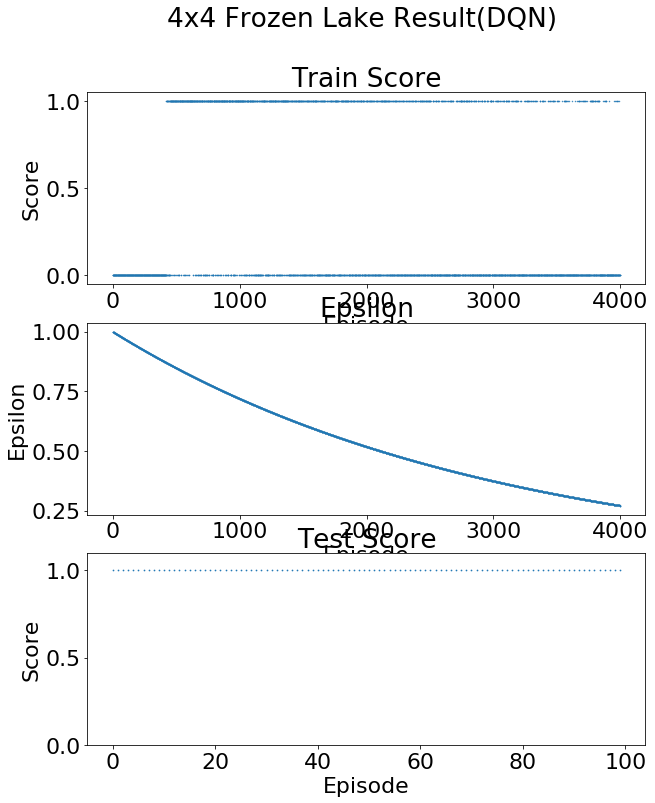

In [19]:
agent=Agent(state_size, action_size)
reward_lst=[]
for episode in range(train_episodes):
    state= env.reset()
    state_arr=np.zeros(state_size)
    state_arr[state] = 1
    state= np.reshape(state_arr, [1, state_size])
    reward = 0
    done = False
    for t in range(max_steps):
        # env.render()
        action = agent.action(state)
        new_state, reward, done, info = env.step(action)
        new_state_arr = np.zeros(state_size)
        new_state_arr[new_state] = 1
        new_state = np.reshape(new_state_arr, [1, state_size])
        agent.add_memory(new_state, reward, done, state, action)
        state= new_state

        if done:
            print(f'Episode: {episode:4}/{train_episodes} and step: {t:4}. Eps: {float(agent.epsilon):.2}, reward {reward}')
            break

    reward_lst.append(reward)

    if len(agent.memory)> batch_size:
        agent.replay(batch_size)

print(' Train mean % score= ', round(100*np.mean(reward_lst),1))

# test
test_wins=[]
for episode in range(test_episodes):
    state = env.reset()
    state_arr=np.zeros(state_size)
    state_arr[state] = 1
    state= np.reshape(state_arr, [1, state_size])
    done = False
    reward=0
    state_lst = []
    state_lst.append(state)
    print('******* EPISODE ',episode, ' *******')

    for step in range(max_steps):
        action = agent.pred(state)
        new_state, reward, done, info = env.step(action)
        new_state_arr = np.zeros(state_size)
        new_state_arr[new_state] = 1
        new_state = np.reshape(new_state_arr, [1, state_size])
        state = new_state
        state_lst.append(state)
        if done:
            print(reward)
            # env.render()
            break

    test_wins.append(reward)
env.close()

print(' Test mean % score= ', int(100*np.mean(test_wins)))

fig=plt.figure(figsize=(10,12))
matplotlib.rcParams.clear()
matplotlib.rcParams.update({'font.size': 22})
plt.subplot(311)
plt.scatter(list(range(len(reward_lst))), reward_lst, s=0.2)
plt.title('4x4 Frozen Lake Result(DQN) \n \nTrain Score')
plt.ylabel('Score')
plt.xlabel('Episode')

plt.subplot(312)
plt.scatter(list(range(len(agent.epsilon_lst))), agent.epsilon_lst, s=0.2)
plt.title('Epsilon')
plt.ylabel('Epsilon')
plt.xlabel('Episode')

plt.subplot(313)
plt.scatter(list(range(len(test_wins))), test_wins, s=0.5)
plt.title('Test Score')
plt.ylabel('Score')
plt.xlabel('Episode')
plt.ylim((0,1.1))
plt.savefig('result.png',dpi=300)
plt.show()

 Test mean % score=  100


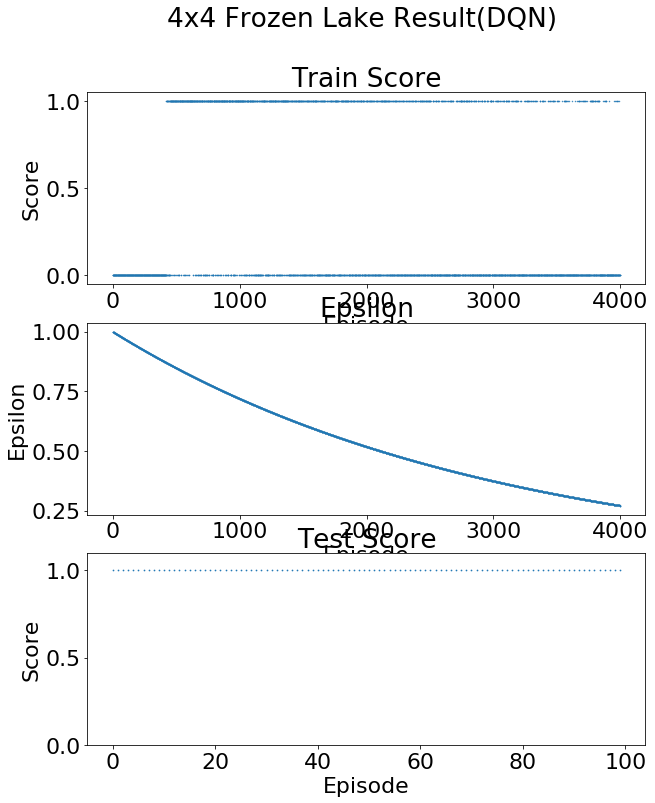

In [20]:
print(' Test mean % score= ', int(100*np.mean(test_wins)))

fig=plt.figure(figsize=(10,12))
matplotlib.rcParams.clear()
matplotlib.rcParams.update({'font.size': 22})
plt.subplot(311)
plt.scatter(list(range(len(reward_lst))), reward_lst, s=0.2)
plt.title('4x4 Frozen Lake Result(DQN) \n \nTrain Score')
plt.ylabel('Score')
plt.xlabel('Episode')

plt.subplot(312)
plt.scatter(list(range(len(agent.epsilon_lst))), agent.epsilon_lst, s=0.2)
plt.title('Epsilon')
plt.ylabel('Epsilon')
plt.xlabel('Episode')

plt.subplot(313)
plt.scatter(list(range(len(test_wins))), test_wins, s=0.5)
plt.title('Test Score')
plt.ylabel('Score')
plt.xlabel('Episode')
plt.ylim((0,1.1))
plt.savefig('result.png',dpi=300)
plt.show()